# Dashboard do Projeto

## Dependências

In [127]:
!pip install dash
!pip install dash-bootstrap-components
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [128]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly"
pio.templates["plotly"]["layout"]["font"] = dict(family="Fira Code, sans-serif", size=14, color="#050609")


## Dataset

- Tranformando target em saída binária.

In [129]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dados = fetch_ucirepo(id=45)

df = dados.data.features
label = dados.data.targets

df['target'] = label

# Transformar todos os valores maiores ou iguais a 1 em 1 na coluna 'target'
df['target'] = df['target'].apply(lambda x: 1 if x >= 1 else 0)

In [130]:
# preto, branco, grenish, vermelho, amarelo
color_pal = ['#050609', '#FAF7F0', '#959672', '#D9230F', '#93C572']

# Variáveis

In [131]:
target_map = {
    0: 'Ausência',
    1: 'Presença'
}

df['target_labels'] = df['target'].map(target_map)

### CP

In [132]:
# Pizza Graph

cp_map = {
    1: 'Angina Típica',
    2: 'Angina Atípica',
    3: 'Dor não Anginosa',
    4: 'Assintomático'
}


df['cp_labels'] = df['cp'].map(cp_map) # nova coluna com nomes das categorias

cp_groupby = df.groupby(['cp_labels']).size().reset_index(name='cp_count')


# Criando o gráfico de pizza com os nomes qualitativos

cp_pizza = px.pie(cp_groupby, 
                  values='cp_count', 
                  names='cp_labels',
                  color='cp_labels',
                  color_discrete_map = {'Angina Típica': color_pal[0], 'Angina Atípica': color_pal[2], 'Dor não Anginosa': color_pal[3], 'Assintomático' : color_pal[4]},
                  labels={'cp_labels': 'Tipo de Angina', 'cp_count' : 'Núm Pacientes'}
                  )

# Cores

# Layout

cp_pizza.update_layout(

    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=12),
    legend=dict(
        title='Dor no peito:',
        orientation = 'h',
        xanchor='center',
        x=0.5,
    ),
)

cp_pizza.show()

In [133]:
cp_groupby

,cp_labels,cp_count
0,Angina Atípica,50
1,Angina Típica,23
2,Assintomático,144
3,Dor não Anginosa,86


In [134]:
sex_map = {1: 'Masculino', 0: 'Feminino'}

df['sex_labels'] = df['sex'].map(sex_map)

# Histograma

cp_sex = px.histogram(

    df,
    x = 'cp_labels',
    color = 'sex_labels',
    barmode = 'group',  # para barras agrupadas, use barmode='stack' se quiser empilhadas
    title="Distribuição de Tipo de Dor no Peito por Sexo",
    labels={'sex_labels': 'Sexo', 'cp_labels': 'Tipo de Angina', 'count': 'Número de Pacientes'},

    # Cores

    color_discrete_map={'Masculino': color_pal[3], 'Feminino': color_pal[4]}
)

# Layout

cp_sex.update_layout(

    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=14),
    title_font= dict(size = 20, color = color_pal[0]),
    
    xaxis_title='Tipo de Angina',
    yaxis_title='Número de Pacientes',
    legend_title='Sexo',
    template='plotly_white',
 

)


cp_sex.show()

In [135]:
# CP note

cp_note = '''
- Pacientes com dor assintomática costumam ter uma maior prevalência de doenças cardíacas. Isso sugere que, embora esses pacientes não apresentem dor no peito, eles podem ter outras características de alto risco, como idade avançada, hipertensão, ou altos níveis de colesterol.

- Pacientes com angina típica tendem a ter uma dor que se manifesta com esforço físico e melhora com o repouso, o que pode indicar uma obstrução nas artérias. Embora apresentem sintomas de dor, o quadro pode estar em um estágio que permite intervenção precoce. Já a angina atípica e a dor não anginosa são menos específicas para doenças cardíacas, podendo também representar sintomas de outras condições.

- Observa-se que homens têm maior prevalência de angina típica e assintomática, enquanto mulheres tendem a ter um aumento de angina atípica. Isso pode refletir diferenças nas manifestações de doenças cardíacas entre os gêneros.

'''

## Sex

In [136]:
sex_groupby = df.groupby(['sex_labels', 'target_labels']).size().reset_index(name='count')

# Gráfico de Barras

sex_bar = px.bar(
    sex_groupby,
    x = 'sex_labels',
    y = 'count',
    color='target_labels',
    color_discrete_map = {'Presença': color_pal[3], 'Ausência': color_pal[2]},
    barmode='group',
    labels={'sex_labels': 'Sexo', 'target_labels': 'Presença de Doença'},
    title = 'Distribuição de Doença por Sexo'
)

# Layout

sex_bar.update_layout(

    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=14),
    title_font= dict(size = 20, color = color_pal[0]),
    
    xaxis_title = 'Sexo',
    yaxis_title = 'Número de Casos',
    legend_title = 'Sexo',
    template='plotly_white',
)

sex_bar.show()

In [137]:
sex_donut = px.pie(
    sex_groupby,
    values='count',
    names='sex_labels',
    color='sex_labels',
    color_discrete_map = {'Feminino': color_pal[0], 'Masculino': color_pal[3]},
    hole=0.3,
    labels = {'sex_labels': 'Sexo', 'count': 'Num Pacientes'},


)

sex_donut.update_traces(textinfo='percent+label')

# Layout

sex_donut.update_layout(

    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=12),

    legend=dict(
        title='Sexo',
        orientation='h',
        x=0.5,
        xanchor='center',
    ),
)

sex_donut.show()

In [138]:
sex_note = '''
- A maior concentração de doença cardíaca está mais associada ao gênero masculino. Uma possível explicação empírica para esse comportamento é pautada nas diferenças de cuidados de saúde entre homens e mulheres, uma questão profunda que envolve até mesmo cultura. Por pura observação,a presença de comportamentos e vícios que prejudicam a saúde, como tabagismo e etilismo, geralmente estão associadas ao sexo masculino. Vale lembrar que essa afirmação é apenas empírica.
'''

## Age

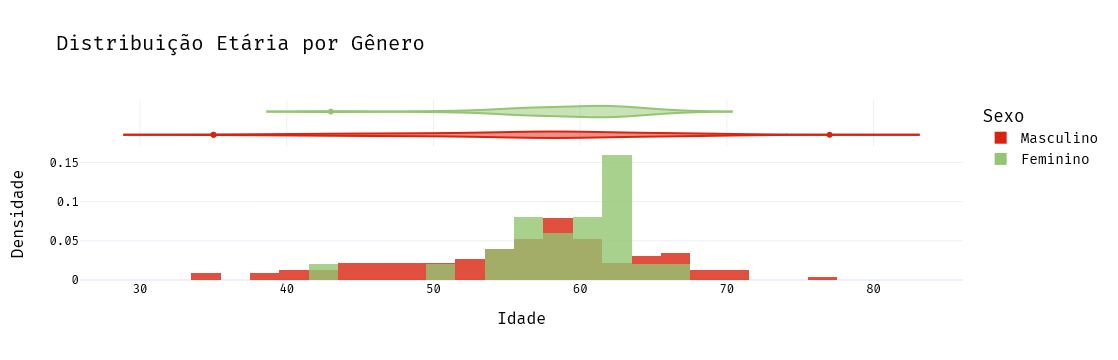

In [139]:
only_positive = df[df['target_labels'] == 'Presença']

age_sex = px.histogram(
    only_positive,
    x='age',
    color='sex_labels',
    nbins=40,
    histnorm='probability density',
    opacity=0.8,
    barmode='overlay',
    marginal='violin',
    color_discrete_map={'Feminino': color_pal[4], 'Masculino': color_pal[3]},
    labels={'sex_labels': 'Sexo', 'age': 'Idade'},
    title= 'Distribuição Etária por Gênero'
)


# Layout

age_sex.update_layout(

    
    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=14),
    title_font= dict(size = 20, color = color_pal[0]),

    xaxis=dict(
        title='Idade',
        title_font=dict(size=16),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Densidade',
        title_font=dict(size=16),
        tickfont=dict(size=12)
    ),
    legend=dict(
        title='Sexo',
    ),
    template='plotly_white',
)

age_sex.show()

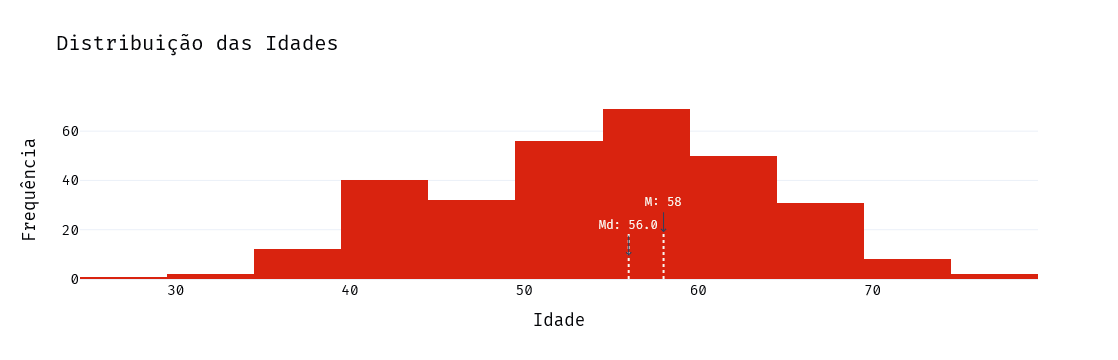

In [164]:
# Estatísticas
moda_age = df['age'].mode()[0]
mediana_age = df['age'].median()

# Histograma
age_hist = px.histogram(
    df, 
    x='age', 
    nbins=10, 
    title='Distribuição das Idades',
    labels={'age': 'Idade'},
    color_discrete_sequence=[color_pal[3]]
)

# Linhas Moda e Mediana
age_hist.add_shape(
    type='line',
    x0=moda_age, y0=0,
    x1=moda_age, y1=df['age'].value_counts().max(),
    line=dict(color=color_pal[1], width=2, dash='dot')
)

age_hist.add_shape(
    type='line',
    x0=mediana_age, y0=0,
    x1=mediana_age, y1=df['age'].value_counts().max(),
    line=dict(color=color_pal[1], width=2, dash='dot')
)

# Notas simplificadas
age_hist.add_annotation(
    x=moda_age, 
    y=df['age'].value_counts().max(),
    text=f'M: {moda_age}',
    arrowhead=4, 
    ax=0, 
    font=dict(family='Fira Code, sans-serif', color=color_pal[1], size=12)
)

age_hist.add_annotation(
    x=mediana_age, 
    y=df['age'].value_counts().max() * 0.5,  # sobreposição
    text=f'Md: {mediana_age}', 
    arrowhead=4, 
    ax=0, 
    font=dict(family='Fira Code, sans-serif', color=color_pal[1], size=12)
)

# Layout
age_hist.update_layout(
    xaxis_title='Idade', 
    yaxis_title='Frequência',
    font=dict(family='Fira Code, sans-serif', color=color_pal[0], size=14),
    title=dict(text='Distribuição das Idades', font=dict(size=20)),
    template='plotly_white',
)

age_hist.show()


In [141]:
# Age Note

age_note = '''
  - O gráfico pode ajudar a identificar faixas etárias específicas onde a presença da doença cardíaca é mais significativa para cada gênero. Pode-se notar que o intervalo entre os 55 e 65 anos de idade, aproximidamente, são os mais afetados pela doença.
  
  - Nas mulheres, há uma probabilidade alta de ocorrência de doença cardíaca em idades mais avançadas somente, a partir dos 50 anos de idade. Provavelmente uma explicação para esse fenômeno é a própria cultura social em que vivemos, onde comportamentos associados ao risco de saúde geralmente são atrelados aos homens, enquanto mulheres tem maior tendência a se cuidar melhor.
'''

## Thalach

In [142]:
thalach_box = px.box(
    df,
    x='sex_labels',
    y='thalach',
    color='target_labels',
    points='all',  # Para mostrar todos os pontos individuais
    color_discrete_map={'Presença': color_pal[3], 'Ausência': color_pal[2]},
    title = 'Freq. Cardíaca Máx. x Gênero e Presença de Doença',
    labels={'target_labels': 'Doença', 'sex_labels': 'Sexo', 'thalach' : 'Freq. Card. Máx.'},
)

thalach_box.update_layout(

    
    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=14),
    title_font= dict(size = 20, color = color_pal[0]),

    xaxis=dict(
        title='Gênero',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12)
    
    ),
    
    legend=dict(
        title='Doença Cardíaca:',
        orientation='h',
        x=0.5,
        y = -0.2,
        xanchor='center',
    ),

    template='plotly_white',
    boxmode = 'group'
)

thalach_box.show()

In [143]:
thalach_violin = px.violin(

    df,
    x='target_labels',
    y='thalach',
    color='target_labels',
    box=True,
    points='outliers',
    color_discrete_map={'Presença': color_pal[3], 'Ausência': color_pal[2]},
    title = 'Freq. Card. Máx. por Presença de Doença',
    labels={'target_labels': 'Doença', 'thalach' : 'Freq. Card. Máx.'}
)

# Personalizando o layout do gráfico
thalach_violin.update_layout(

    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=14),
    title_font= dict(size = 20, color = color_pal[0]),

    xaxis=dict(
        title='Doença',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Frequência Cardíaca Máxima',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    
    legend=dict(
        title='Doença Cardíaca: ',
        orientation='h',
        x=0.5,
        y = -0.2,
        xanchor='center',
    ),
    
    template='plotly_white',
)


thalach_violin.show()


In [144]:
# Note

thalach_note = '''
- A variável thalach representa a frequência cardíaca máxima alcançada por um paciente durante o exercício, que é uma medida significativa em cardiologia. Diferente do esperado, no conjunto de dados temos uma correlação inversa, ou seja, valores mais baixos de frequência cardíaca são mais relevantes para a presença de doença cardíaca no paciente.

- Isso ocorre pois uma frequência cardíaca mais baixa durante um teste de stress indica um má funcionamento na função cardíaca, indicando possível problema. Visivelmente no boxplot, os casos com pacientes com presença de doença cardíaca tem valores de frequência cardíaca máxima menores.
'''

## Thal

In [145]:
thal_map = {
    3: 'Normal',
    6: 'Defeito Fixo',
    7: 'Defeito Reversível'
}

df['thal_labels'] = df['thal'].map(thal_map)


In [146]:
thal_groupby = df.groupby(['thal_labels', 'target_labels']).size().reset_index(name='thal_count')


thal_bar =  px.bar(thal_groupby, 
                   x = 'thal_labels', 
                   y = 'thal_count',
                   color =  'target_labels',
                   color_discrete_map = {'Presença': color_pal[3], 'Ausência': color_pal[2]},
                   barmode='group',
                   labels={'thal_labels': 'Talassemia', 'target_labels': 'Presença de Doença'},
                   title = 'Talassemia por Doença',
                    )

# Layout

thal_bar.update_layout(

    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=14),
    title_font= dict(size = 20, color = color_pal[0]),
    
    xaxis_title = 'Tipo de Talassemia',
    yaxis_title = 'Número de Casos',
    legend_title = 'Doença',
    template='plotly_white',
)

thal_bar.show()

In [147]:
thal_pizza = px.pie(
    thal_groupby,
    values='thal_count',
    names='thal_labels',
    color='thal_labels',
    color_discrete_map = {'Defeito Fixo': color_pal[0], 'Defeito Reversível': color_pal[2], 'Normal' : color_pal[3]},
    labels = {'thal_labels': 'Talassemia', 'thal_count': 'Num Pacientes'},


)

thal_pizza.update_traces(textinfo='percent')

# Layout

thal_pizza.update_layout(

    font=dict(family ='Fira Code, sans-serif', color = color_pal[0], size=12),

    legend=dict(
        title='Talassemia',
        orientation = 'h',
        xanchor='center',
        x=0.5,
    ),
)


thal_pizza.show()

In [148]:
thal_note = '''
    - A variável Thal, no contexto desse conjunto de dados, representa diferentes tipos de talassemia, uma condição genética que afeta a capacidade do sangue de transportar oxigênio.
    
    - Observando os dados no conjunto, pode-se notar que a condição do defeito reversível — que indica a presença de regiões do coração que, sob esforço físico, recebem sangue de forma inadequada, mas essa condição pode ser revertida em repouso — tem o maior número de casos de doença cardíaca confirmada.

'''

# Componentes

In [149]:
styles = {
    
    'card_header' : {'backgroundColor': '#FAF7F0', 
                      'color' : '#1A1A19'},
        
    'row': {'margin': 'auto', 
            'padding': '12px', 
            'marginLeft': '10px', 
            'marginRight': '10px'
            },
    
    'section': {'padding': '12px', 
                'borderRadius': '16px', 
                'marginBottom': '32px', 
                'backgroundColor': color_pal[0], 
                'boxShadow': '0px 4px 8px rgba(0, 0, 0, 0.3)',
                'transition': 'box-shadow 0.3s ease-in-out',
                'font-family' : 'Fira Code, sans-serif',
                ':hover': {
                        'boxShadow': '0px 32px 32px rgba(255,255,255, 1)'
                }
            },
    
    'anotacoes': {'padding' : '32px'},

    
    'notes': {'color': 'white',
             'font-family': 'Fira Code, sans-serif',
             'font-size': '16px',
             'line-height': '1.6',
             'margin': '0 auto',
             'padding': '12px',
             'background-color': color_pal[0],
             'border-radius': '8px',
             'box-shadow': '0px 0px 10px rgba(0, 0, 0, 0.2)',
             'text-align': 'justify'},
    

    'notes_title' : {'font-family': 'FiraCode, sans-serif',
                    'font-weight': 'bold',
                    'text-align': 'center',
                    'color': '#FFFFFF',
                    'margin-bottom': '15px'}
    
}

In [150]:
card1 = [
    dbc.CardHeader('Registros'),
    dbc.CardBody(
        [
            html.H3('303', className="card-info"),
            html.P('Pacientes registrados no dataset', className="card-text")
        ]
    ),
]

card2 = [
    dbc.CardHeader('Atributos'),
    dbc.CardBody(
        [
            html.H3('14', className="card-info"),
            html.P('Classes presentes no dataset', className="card-text")
        ]
    ),
]

card3 = [
    dbc.CardHeader('Conjunto de Dados'),
    dbc.CardBody(
        [
            html.H3('Cleveland', className="card-info"),
            html.P('Heart Disease UCI', className="card-text")
        ]
    ),
]

In [151]:
dropdown_menu = [
    dbc.CardHeader("Escolha uma Opção", className= 'card_header', style=styles['card_header']),
    dbc.CardBody([
        dcc.Dropdown(
            id='dropdown',
            options=[
                {'label': 'Dor no Peito', 'value': 'cp'},
                {'label': 'Idade', 'value': 'age'},
                {'label': 'Freq. Cardíaca', 'value': 'thalach'},
                {'label': 'Talassemia', 'value': 'thal'},
                {'label': 'Gênero', 'value': 'sex'}
            ],
            value='cp',
            style= {'backgroundColor': color_pal[1], 'color': color_pal[0]}),
])]

# Aplicação

In [ ]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.SIMPLEX])


# Layout

# Cards

app.layout = dbc.Container([

    html.Div([
        dbc.Row([

            dbc.Col(dbc.Card(card1, color='primary', inverse = True, style = {'border': 'none'}), width = 3),
            dbc.Col(dbc.Card(card2, color='primary', inverse = True, style = {'border': 'none'}), width = 3),
            dbc.Col(dbc.Card(card3, color='primary', inverse = True, style = {'border': 'none'}), width = 6),
           # dbc.Col(dbc.Card(card_content, color="primary", inverse=True, style=styles['card_body']), width= 2),

        ], style=styles['row']),
    ], style=styles['section']),

# Dropdown & Filtros

    html.Div([
        dbc.Row([
            dbc.Col(dbc.Card(dropdown_menu, color = 'primary', inverse = True, style = {'border' : 'none'}), width = 4),
        ], style=styles['row']),
    ], style=styles['section']),

    # Linha com gráficos
    html.Div([
        dbc.Row([
            dbc.Col(dcc.Graph(id='grafico-esquerdo'), id='col-esquerdo', width=8),
            dbc.Col(dcc.Graph(id='grafico-direito'), id='col-direito', width = 4),
        ], style=styles['row']),
    ], style=styles['section']),

    # Área para anotações
    
    html.Div([
        dbc.Row([
            html.H2('Anotações', className='notes_title', style=styles['notes_title']),
            dbc.Col(dcc.Markdown(id='anotacoes', className = 'anotacoes', style={'color': 'white'}), width=12),
        ], style=styles['row']),
    ], style=styles['section']),




], fluid=True, style={'backgroundColor': '#212121', 'padding': '40px'})

# Callback para atualizar os gráficos e anotações com base na variável selecionada
@app.callback(
    [Output('grafico-esquerdo', 'figure'),
     Output('grafico-direito', 'figure'),
     Output('anotacoes', 'children'),
     Output('col-esquerdo', 'width'),
     Output('col-direito', 'width')],

    [Input('dropdown', 'value')]
)


def atualizar_conteudo(variavel):
    
    
    #size default
    fig_esq_size = 8
    fig_dir_size = 4

    # AGE - DONE

    if variavel == 'age':

        fig_esquerdo = age_sex
        fig_direito = age_hist
        anotacao = age_note
        fig_esq_size = 8
        fig_dir_size = 4


    # CP - DONE

    elif variavel == 'cp':
      fig_esquerdo = cp_sex
      fig_direito = cp_pizza
      anotacao = cp_note
        

    # THALACH - DONE

    elif variavel == 'thalach':
        fig_esquerdo = thalach_box
        fig_direito = thalach_violin
        anotacao = thalach_note
        fig_esq_size = 7
        fig_dir_size = 5

    # THAL

    elif variavel == 'thal':
        fig_esquerdo = thal_bar
        fig_direito = thal_pizza
        anotacao = thal_note
        fig_esq_size = 8
        fig_dir_size = 4

    # SEX - DONE

    elif variavel == 'sex':
        fig_esquerdo = sex_bar
        fig_direito = sex_donut
        anotacao = sex_note

    return fig_esquerdo, fig_direito, anotacao, fig_esq_size, fig_dir_size

# Rodar o servidor
if __name__ == '__main__':
    app.run(jupyter_mode="external")